In [2]:
from animals import *
from cities import city
import numpy as np
from numpy import linalg as LA

In [3]:
print props.shape

(32, 84)


In [4]:
class SOM(object):
    def __init__(self, inputs, nr_output_nodes):
        nr_features = inputs.shape[1]
        self.inputs = inputs
        self.weights = np.random.uniform(0, 1, size=(nr_output_nodes, nr_features))
        
    def neighbor_indices(self, inputs, i, n):
        N = inputs.shape[0] 
        if i - n < 0 and i + n > 0:
            indices = np.arange(i-n,i+n+1)
        elif i-n < N - 1 and i+n > N - 1:
            rest = i+n - N
            indices = np.hstack([np.arange(0,rest), np.arange(i-n,N)])
        else:
            indices = np.arange(i-n, i+n+1)
        return indices

    def fit(self, nr_neighbors=50):
        max_epochs = 20
        step_neighbors = 1.0*nr_neighbors / (max_epochs - 1)
        step_size = 0.2
        for epoch in xrange(max_epochs):
            for i in xrange(len(self.inputs)):
                properties = self.inputs[i]
                diff = properties - self.weights
                diff_norm = LA.norm(diff, axis=1)
                min_diff_idx = np.argmin(diff_norm)
                min_diff = diff[min_diff_idx]

                n = int(np.round(nr_neighbors/2))
                #print('n: {}'.format(n))
                winner_indices = self.neighbor_indices(self.weights, min_diff_idx, n)
                self.weights[winner_indices] += step_size * (properties - self.weights[winner_indices])
            nr_neighbors -= step_neighbors
    
    def get_winners(self):
        pos = np.empty(self.inputs.shape[0], dtype=np.int32)
        for i in xrange(len(pos)):
            features = self.inputs[i]
            diff = features - self.weights
            diff_norm = LA.norm(diff, axis=1)
            min_diff_idx = np.argmin(diff_norm)
            pos[i] = min_diff_idx
        return pos
    
som = SOM(props, 100)
som.fit(nr_neighbors=50)
pos = som.get_winners()
sort_pos_idx = np.argsort(pos)
sort_pos_idx
print('sort pos: {}'.format(sort_pos_idx))
print('snames: {}'.format(np.take(snames, [sort_pos_idx])))

sort pos: [26  0 14  6 25 16  1 30 17 21  5 15  4 10 23 11 24 22 13 28  8 31  3 18  9
 29 20  7 27  2 12 19]
snames: [['rabbit' 'antelop' 'giraffe' 'camel' 'pig' 'horse' 'ape' 'spider'
  'housefly' 'moskito' 'butterfly' 'grasshopper' 'beetle' 'dragonfly'
  'pelican' 'duck' 'penguin' 'ostrich' 'frog' 'seaturtle' 'crocodile'
  'walrus' 'bear' 'hyena' 'dog' 'skunk' 'lion' 'cat' 'rat' 'bat' 'elephant'
  'kangaroo']]


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[[ 0.86218533  0.64486646]
 [ 0.69659529  0.52728968]
 [ 0.60751346  0.68846337]
 [ 0.50353625  0.93224318]
 [ 0.24662043  0.76152761]
 [ 0.38361955  0.44289577]
 [ 0.2038484   0.19320645]
 [ 0.46881329  0.23502761]
 [ 0.64169619  0.25936045]
 [ 0.8356236   0.35967416]
 [ 0.86218533  0.64486646]]


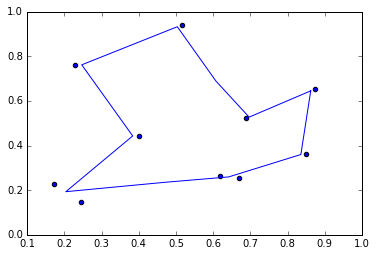

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
cities = np.array(city)
som = SOM(cities, 10)
som.fit(2)
winners = som.get_winners()
w = som.weights

#print w
tour = np.vstack((w, w[0,:]))
print tour
plt.scatter(cities[:,0], cities[:,1])
plt.plot(tour[:,0], tour[:,1])

In [6]:
from itertools import product, starmap

a = np.zeros(100)
i = 89
img = a.reshape(10,10)
# img[xpos[i],ypos[i]] = 1

def neighbours(cell, size=10, nr_neighbors=2):
    for c in product(*(xrange(n-nr_neighbors, n+nr_neighbors+1) for n in cell)):
        if all(0 <= n < size for n in c):
            yield c
            
x = np.arange(10)
y = x
xx,yy = np.meshgrid(x,y, indexing='xy')

xpos = np.reshape(xx, -1)
ypos = np.reshape(yy, -1)

print('x: {}, y: {}'.format(xpos[i], ypos[i]))
print a.reshape(10,10)

print('n: {}'.format(list(neighbours((xpos[i], ypos[i])))))

for n in neighbours((ypos[i], xpos[i])):
    img[n] = 1

print a.reshape(10,10)

# a[8,7]

x: 9, y: 8
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
n: [(7, 6), (7, 7), (7, 8), (7, 9), (8, 6), (8, 7), (8, 8), (8, 9), (9, 6), (9, 7), (9, 8), (9, 9)]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.]]


In [7]:
from votes import *
from mpsex import *
from mpdistrict import *
from mpparty import *

nr_members = 349
nr_votes = 31

votes = np.array(votes).reshape(nr_members,nr_votes)
mpsex = np.array(mpsex)
mpdistrict = np.array(mpdistrict)
mpparty = np.array(mpparty)

In [8]:
from itertools import product, starmap

class SOM2d(object):
    def __init__(self, inputs, output_shape):
        nr_features = inputs.shape[1]
        self.inputs = inputs
        self.weights = np.random.uniform(0, 1, size=(np.prod(output_shape), nr_features))
        
        x = np.arange(output_shape[0])
        y = np.arange(output_shape[1])
        xx,yy = np.meshgrid(x,y, indexing='xy')
        self.xpos = np.reshape(xx, -1)
        self.ypos = np.reshape(yy, -1)
        self.output_shape = output_shape
        
    def neighbors(self, cell, size, nr_neighbors=1):
        for c in product(*(xrange(n-nr_neighbors, n+nr_neighbors+1) for n in cell)):
            if all(0 <= n < size for n in c):
                yield c

    def fit(self, nr_neighbors=50):
        max_epochs = 40
        step_neighbors = 1.0*nr_neighbors / (max_epochs - 1)
        step_size = 0.2
        for epoch in xrange(max_epochs):
            for i in xrange(len(self.inputs)):
                properties = self.inputs[i]
                diff = properties - self.weights
                diff_norm = LA.norm(diff, axis=1)
                min_diff_idx = np.argmin(diff_norm)
                min_diff = diff[min_diff_idx]

                n = int(np.round(nr_neighbors/4))
                cell = (xpos[min_diff_idx], ypos[min_diff_idx])
                winner_indices = self.neighbors(cell, self.output_shape[0], nr_neighbors=n)

                img = self.weights.reshape(self.output_shape[0], self.output_shape[1], -1)
                for w in winner_indices:
                    img[w] += step_size * (properties - img[w])
            nr_neighbors -= step_neighbors
    
    def get_winners(self):
        pos = np.empty(self.inputs.shape[0], dtype=np.int32)
        for i in xrange(len(pos)):
            features = self.inputs[i]
            diff = features - self.weights
            diff_norm = LA.norm(diff, axis=1)
            min_diff_idx = np.argmin(diff_norm)
            pos[i] = min_diff_idx
        return pos
    

(100,)
pos: (349,)


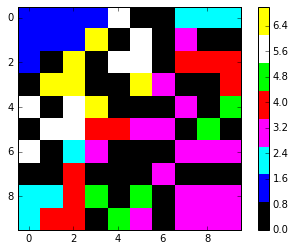

In [9]:
colors = [(0,0,0),(0,0,1),(0,1,1),(1,0,1),(1,0,0),(0,1,0),(1,1,1),(1,1,0)]
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors, 'indexed')

som = SOM2d(votes, output_shape=(10,10))
som.fit(nr_neighbors=20)
winners = som.get_winners()
winners
pos = winners

a = np.empty(100, dtype=np.int32)
a[:] = np.ones(100).dot(349)

print a.shape
print('pos: {}'.format(pos.shape))
a[pos] = np.arange(349)

p = np.hstack([mpparty, 0])
a_reshape = a.reshape(10,10)
img = p[a].reshape(10,10)
im = plt.imshow(img, cmap, interpolation='nearest')
plt.colorbar()

In [10]:
from itertools import product
weight_size = 3
shape = (10,10)
num_weights = np.prod(shape)
weight_positions = [range(x) for x in shape]
codebook = np.array([np.array(x) for x in product(*weight_positions)])
weights = np.random.rand(num_weights, weight_size)
weights
codebook[11]

array([1, 1])

In [ ]:
a = np.random.uniform(0,1,(100,31))
img = a.reshape(10,10,-1)

print a[34]
print img[3,4]